In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime
import ast

TODO:

- <del> Compile histogram plots for mean, (std), min, max </del> 
- Compile timeseries plots?

- <del> Compile plots for MSG </del>
- <del> Compile plots for GOES </del> 

- Make code more elegant?

- <del> Document in slide deck </del> 

In [102]:
msg_stats_file = 'msg_2020_hourly.csv'
goes_stats_file = 'goes_2020_hourly.csv'

In [103]:
msg_ds = pd.read_csv(msg_stats_file)
goes_ds = pd.read_csv(goes_stats_file)

In [104]:
goes_ds.head()

,datetime,wavelengths,mean,std,max,min
0,20200101010021,"[0.4699999988079071, 0.6399999856948853, 0.870...","[28.171156, 19.210163, 13.617682, 0.659956, 2....","[71.068855, 53.009712, 38.46162, 3.463629, 8.0...","[804.0361, 628.6211, 372.8076, 63.395058, 95.0...","[-0.761351, -1.573456, 0.050756, -0.761351, -0..."
1,20200101020021,"[0.4699999988079071, 0.6399999856948853, 0.870...","[18.700567, 13.717395, 10.406793, 0.583709, 2....","[64.64204, 50.645893, 38.670525, 3.724318, 8.4...","[804.0361, 628.6211, 372.8076, 83.697716, 95.0...","[-0.761351, -1.573456, -0.761351, 0.050756, -0..."
2,20200101030021,"[0.4699999988079071, 0.6399999856948853, 0.870...","[10.900599, 8.526813, 6.957711, 0.550071, 1.57...","[56.1061, 46.213715, 37.068226, 4.467287, 8.52...","[804.0361, 628.6211, 372.8076, 131.61198, 95.0...","[-0.761351, -2.385563, -0.761351, 0.050756, 0...."
3,20200101040021,"[0.4699999988079071, 0.6399999856948853, 0.870...","[4.708268, 3.81798, 3.426911, 0.305898, 0.8554...","[37.773594, 32.27736, 28.09804, 3.38721, 6.970...","[804.0361, 628.6211, 372.8076, 140.54517, 95.0...","[-0.761351, -1.573456, 0.050756, -0.761351, -0..."
4,20200101050021,"[0.4699999988079071, 0.6399999856948853, 0.870...","[2.745456, 2.340491, 2.26305, 0.12021, 0.58453...","[26.654135, 23.897106, 23.278519, 1.186578, 5....","[798.3513, 628.6211, 372.8076, 103.18826, 95.0...","[-0.761351, -2.385563, 0.050756, 0.050756, -0...."


In [151]:
ds = msg_ds

In [152]:
datetime_strs = [str(f) for f in ds['datetime'].values]
datetimes = [datetime.datetime(
    year=int(f[0:4]), 
    month=int(f[4:6]), 
    day=int(f[6:8]), 
    hour=int(f[8:10]), 
    minute=int(f[10:12]), 
    second=int(f[12:14])) for f in datetime_strs]

In [153]:
ds['datetimes'] = datetimes
ds = ds.set_index('datetimes')

In [154]:
wavelengths = sorted(ast.literal_eval(ds['wavelengths'][0]))
wavelengths = [round(wvl, 2) for wvl in wavelengths]

/var/tmp/ipykernel_284818/3346840324.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wavelengths = sorted(ast.literal_eval(ds['wavelengths'][0]))


In [155]:
mean_dict = {}

for i, wvl in enumerate(wavelengths):
    means = [ast.literal_eval(ds['mean'][x])[i] for x in range(len(ds))]
    mean_dict[wvl] = means

std_dict = {}

for i, wvl in enumerate(wavelengths):
    stds = [ast.literal_eval(ds['std'][x])[i] for x in range(len(ds))]
    std_dict[wvl] = stds

min_dict = {}

for i, wvl in enumerate(wavelengths):
    mins = [ast.literal_eval(ds['min'][x])[i] for x in range(len(ds))]
    min_dict[wvl] = mins

max_dict = {}

for i, wvl in enumerate(wavelengths):
    maxs = [ast.literal_eval(ds['max'][x])[i] for x in range(len(ds))]
    max_dict[wvl] = maxs

/var/tmp/ipykernel_284818/3335614915.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  means = [ast.literal_eval(ds['mean'][x])[i] for x in range(len(ds))]
/var/tmp/ipykernel_284818/3335614915.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stds = [ast.literal_eval(ds['std'][x])[i] for x in range(len(ds))]
/var/tmp/ipykernel_284818/3335614915.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mins = [ast.literal_eval(ds['mi

In [156]:
for wvl in wavelengths:
    print(f"Wavelength: {wvl} -----------")
    print(f"Mean: {np.mean(mean_dict[wvl])}")
    print(f"Std: {np.mean(std_dict[wvl])}")
    print(f"Min: {np.min(min_dict[wvl])}, {np.mean(min_dict[wvl])}, {np.max((min_dict[wvl]))}")
    print(f"Max: {np.min(max_dict[wvl])}, {np.mean(max_dict[wvl])}, {np.max(max_dict[wvl])}")


Wavelength: 0.64 -----------
Mean: 1.5352595042499426
Std: 1.973000262462669
Min: 0.0, 0.001953898575694923, 0.439134
Max: 0.231123, 16.109167147599354, 22.59035
Wavelength: 0.81 -----------
Mean: 0.5461627033080633
Std: 0.3236610869515277
Min: 0.0, 0.0008333544681828623, 0.040245
Max: 1.053696, 3.313285170457156, 3.556224
Wavelength: 1.64 -----------
Mean: 48.20069730794855
Std: 16.308268858947855
Min: 0.0, 2.492448605099931, 4.055818
Max: 66.66751, 89.04358961876866, 123.19548
Wavelength: 3.92 -----------
Mean: 41.82383598472318
Std: 12.518420813347118
Min: 0.0, 9.346260217321388, 12.163427
Max: 57.490383, 69.76229416207214, 101.05
Wavelength: 6.25 -----------
Mean: 81.47577027406385
Std: 24.453957457155987
Min: 0.0, 6.62435232770503, 10.251783
Max: 107.23366, 138.92570565161958, 199.29468
Wavelength: 7.35 -----------
Mean: 93.33546264817366
Std: 26.18618167068688
Min: 0.0, 9.91146222226051, 14.450225
Max: 120.49265, 152.864244063864, 216.08644
Wavelength: 8.7 -----------
Mean: 77.87

In [157]:
# Generate a list of colors from the 'plasma' colormap
colormap = plt.cm.plasma_r
colors = [colormap(i / (len(wavelengths) - 1)) for i in range(len(wavelengths))]


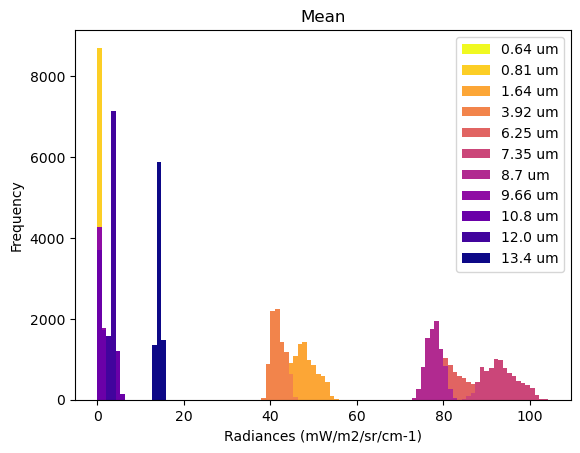

In [158]:
# Initialize variables to store the overall max and min values
overall_max = float('-inf')
overall_min = float('inf')

# Iterate through the dictionary
for key, value_list in mean_dict.items():
    # Update the overall max and min values
    overall_max = max(overall_max, max(value_list))
    overall_min = min(overall_min, min(value_list))

bins = np.linspace(overall_min, overall_max, 100)

plt.figure()
for i, wvl in enumerate(wavelengths):
    plt.hist(mean_dict[wvl], label=f"{wvl} um", color=colors[i], bins=bins)
plt.xlabel("Radiances (mW/m2/sr/cm-1)")
plt.ylabel("Frequency")
plt.title("Mean")
plt.legend()

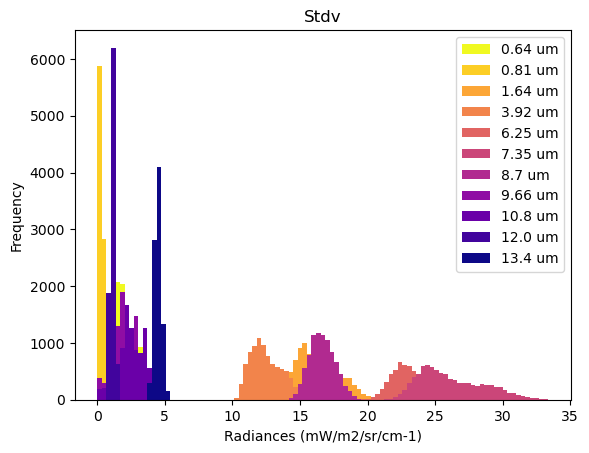

In [159]:
# Initialize variables to store the overall max and min values
overall_max = float('-inf')
overall_min = float('inf')

# Iterate through the dictionary
for key, value_list in std_dict.items():
    # Update the overall max and min values
    overall_max = max(overall_max, max(value_list))
    overall_min = min(overall_min, min(value_list))

bins = np.linspace(overall_min, overall_max, 100)


plt.figure()
for i, wvl in enumerate(wavelengths):
    plt.hist(std_dict[wvl], label=f"{wvl} um", color=colors[i], bins=bins)
plt.xlabel("Radiances (mW/m2/sr/cm-1)")
plt.ylabel("Frequency")
plt.title("Stdv")
plt.legend()

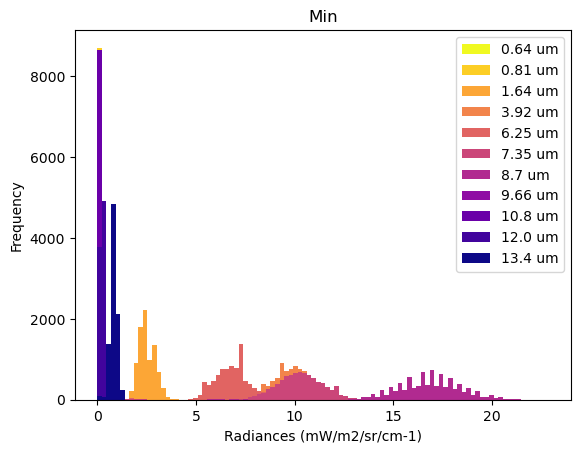

In [160]:
# Initialize variables to store the overall max and min values
overall_max = float('-inf')
overall_min = float('inf')

# Iterate through the dictionary
for key, value_list in min_dict.items():
    # Update the overall max and min values
    overall_max = max(overall_max, max(value_list))
    overall_min = min(overall_min, min(value_list))

bins = np.linspace(overall_min, overall_max, 100)


plt.figure()
for i, wvl in enumerate(wavelengths):
    plt.hist(min_dict[wvl], label=f"{wvl} um", color=colors[i], bins=bins)
plt.xlabel("Radiances (mW/m2/sr/cm-1)")
plt.ylabel("Frequency")
plt.title("Min")
plt.legend()

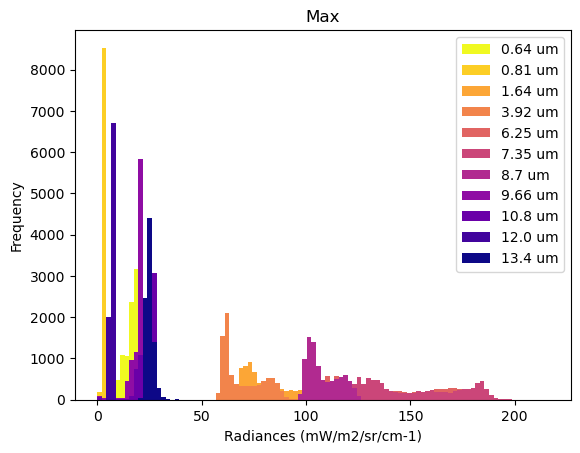

In [161]:
# Initialize variables to store the overall max and min values
overall_max = float('-inf')
overall_min = float('inf')

# Iterate through the dictionary
for key, value_list in max_dict.items():
    # Update the overall max and min values
    overall_max = max(overall_max, max(value_list))
    overall_min = min(overall_min, min(value_list))

bins = np.linspace(overall_min, overall_max, 100)

plt.figure()
for i, wvl in enumerate(wavelengths):
    plt.hist(max_dict[wvl], label=f"{wvl} um", color=colors[i], bins=bins)
plt.xlabel("Radiances (mW/m2/sr/cm-1)")
plt.ylabel("Frequency")
plt.title("Max")
plt.legend()

In [99]:
np.max(max_dict[0.64])

10373.086

#### Check data quality

In [134]:
raw_file = '/home/anna.jungbluth/data/goes/OR_ABI-L1b-RadF-M6C01_G16_s20200010100216_e20200010109524_c20200010109581.nc'
geo_file = '/home/anna.jungbluth/data/20200101010021_goes16.nc'

In [135]:
ds_raw = xr.open_dataset(raw_file)
ds_geo = xr.open_dataset(geo_file)

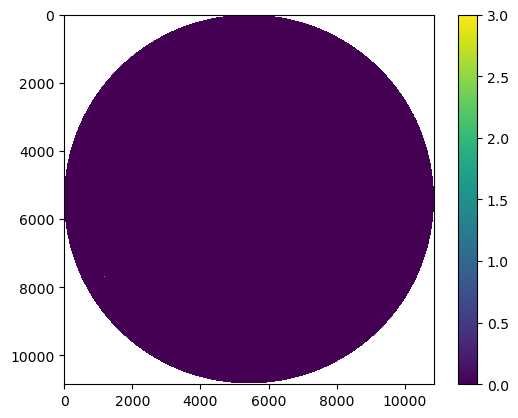

In [150]:
plt.imshow(ds_raw['DQF'].values, interpolation='none')
plt.colorbar()

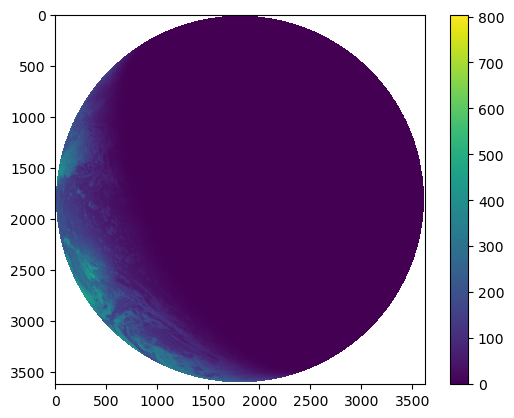

In [133]:
plt.imshow(ds_geo['Rad'][0].values)
plt.colorbar()

In [53]:
for i, wvl in enumerate(wavelengths):
    for x in min_dict[wvl]:
        if x < 0:
            print(f"negative radiance in {wvl} um, {i}")
            break
    

negative radiance in 0.47 um, 0
negative radiance in 0.64 um, 1
negative radiance in 0.87 um, 2
negative radiance in 1.38 um, 3
negative radiance in 1.61 um, 4
negative radiance in 2.25 um, 5
negative radiance in 6.17 um, 7
negative radiance in 6.93 um, 8
negative radiance in 7.34 um, 9
negative radiance in 8.44 um, 10
negative radiance in 9.61 um, 11
negative radiance in 10.33 um, 12
negative radiance in 11.19 um, 13
negative radiance in 12.27 um, 14
negative radiance in 13.27 um, 15


### Developing new normalization scripts

In [253]:
from typing import Optional, List, Union, Tuple
from omegaconf import DictConfig
from datetime import datetime
import pandas as pd
from loguru import logger
import glob, os
import numpy as np
import pandas as pd

import xarray as xr
from functools import partial

def get_split_norm(norm_df: pd.DataFrame, split_dict: DictConfig) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Generic function to split files based on dataset specification.

    Args:
        norm_df (pd.DataFrame): A dataframe containing the normalization statistics.
        split_dict (DictConfig): A dictionary-like object containing the dataset specification.

    Returns:
        Tuple[List, List]: A tuple containing two lists: the training set and the validation set.
    """
    # Extract dates from filenames
    datetime_strs = [str(f) for f in norm_df['datetime'].values]
    indexes = norm_df.index.values
    dates = get_dates_from_files(datetime_strs)
    # Convert to dataframe for easier manipulation
    df = pd.DataFrame({"indexes": indexes, "date": dates})

    # Check if years, months, and days are specified
    if "years" not in split_dict.keys() or split_dict["years"] is None:
        logger.info("No years specified for split. Using all years.")
        split_dict["years"] = df.date.dt.year.unique().tolist()
    if "months" not in split_dict.keys() or split_dict["months"] is None:
        logger.info("No months specified for split. Using all months.")
        split_dict["months"] = df.date.dt.month.unique().tolist()
    if "days" not in split_dict.keys() or split_dict["days"] is None:
        logger.info("No days specified for split. Using all days.")
        split_dict["days"] = df.date.dt.day.unique().tolist()

    # Determine conditions specified split
    condition = (df.date.dt.year.isin(split_dict["years"])) & \
                (df.date.dt.month.isin(split_dict["months"])) & \
                (df.date.dt.day.isin(split_dict["days"]))
        
    # Extract filenames based on conditions
    split_indexes = df[condition].indexes.tolist()

    # Check if files are allocated properly
    if len(split_indexes) == 0:
        raise ValueError("No files found for normalization. Check split specification.")
    
    return split_indexes

In [254]:
def get_dates_from_files(filenames: List[str]) -> List[datetime]:
    """
    Extract dates from a list of filenames.

    Args:
        filenames (List[str]): A list of filenames.

    Returns:
        List[str]: A list of dates extracted from the filenames.
    """
    dates = [datetime.strptime(filename.split("_")[0], "%Y%m%d%H%M%S") for filename in filenames]
    return dates

In [259]:
def get_dict_norm(norm_df, column):
    norm_df = norm_df.reset_index(drop=True)
    if column not in ['mean', 'std']:
        raise ValueError("Column must be either 'mean' or 'std'.")
    wavelengths = sorted(ast.literal_eval(norm_df['wavelengths'][0]))
    wavelengths = [round(wvl, 2) for wvl in wavelengths]

    dict_norm = {}
    for i, wvl in enumerate(wavelengths):
        values = [ast.literal_eval(norm_df[column][x])[i] for x in range(len(norm_df))]
        dict_norm[wvl] = values
    return dict_norm

In [260]:
splits_dict = { 
    "train": {
        "years": [2020], 
        "months": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
        "days": list(range(1, 20))
        },
    "val": {
        "years": [2020],
        "months": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
        "days": list(range(20, 32))
        },
}

In [294]:
def calculate_overall_mean(means):
    """
    Calculate the overall mean of the means.
    """
    wavelengths = list(means.keys())
    dict_means = {}
    for wvl in wavelengths:
        dict_means[wvl] = np.mean(means[wvl])
    return dict_means

In [295]:
def calculate_overall_std(means, stds):
    """
    Calculate the overall standard deviation of the means.
    """
    wavelengths = list(means.keys())
    dict_stds = {}
    for wvl in wavelengths:
        vars_wvl = [stds[wvl][i]**2 for i in range(len(stds[wvl]))]
        mean_var = np.mean(vars_wvl)
        var_means = np.std(means[wvl])**2
        dict_stds[wvl] = np.sqrt(mean_var + var_means)
    return dict_stds

In [325]:
def compile_norm_dict(mean_dict, std_dict):
    """
    Compile the normalization statistics into a JSON object.
    """
    wavelengths = list(mean_dict.keys())
    norm_dict = {}
    for wvl in wavelengths:
        norm_dict[wvl] = {
            "mean": round(mean_dict[wvl], 6),
            "std": round(std_dict[wvl], 6)
        }
    return norm_dict

In [326]:
def calculate_norm_from_metrics(file, split_dict):
    # Read csv file
    df = pd.read_csv(file)
    # Extract indexes for specified split
    split_idx = get_split_norm(df, split_dict)
    # Extract relevant entries in df
    split_df = df.loc[split_idx]
    # Extract dictionary of means and stds
    means = get_dict_norm(split_df, 'mean')
    stds = get_dict_norm(split_df, 'std')
    # Calculate overall mean & std from list of means & stds
    overall_mean = calculate_overall_mean(means=means)
    overall_std = calculate_overall_std(means=means, stds=stds)
    # Compile json file
    norm_dict = compile_norm_dict(overall_mean, overall_std)
    return norm_dict

In [327]:
calculate_norm_from_metrics('goes_2020_hourly.csv', splits_dict['train'])

{0.47: {'mean': 66.846452, 'std': 97.797946},
 0.64: {'mean': 40.140616, 'std': 69.155545},
 0.87: {'mean': 28.537127, 'std': 48.427876},
 1.38: {'mean': 1.218253, 'std': 4.684241},
 1.61: {'mean': 4.869153, 'std': 8.465454},
 2.25: {'mean': 1.229801, 'std': 2.153524},
 3.89: {'mean': 0.552063, 'std': 0.439728},
 6.17: {'mean': 2.896379, 'std': 1.029468},
 6.93: {'mean': 8.019446, 'std': 2.661187},
 7.34: {'mean': 13.813419, 'std': 4.443783},
 8.44: {'mean': 42.208005, 'std': 14.410343},
 9.61: {'mean': 39.162122, 'std': 11.833699},
 10.33: {'mean': 73.621065, 'std': 22.143675},
 11.19: {'mean': 84.195663, 'std': 24.259259},
 12.27: {'mean': 92.689381, 'std': 24.6886},
 13.27: {'mean': 83.288657, 'std': 18.806773}}

In [324]:
norm = xr.open_dataset('normalization/goes_norm.nc')
norm['std'][:].values

array([83.47659849, 57.97639226, 40.76428406,  3.89116785,  7.25425516,
        1.72063327,  0.39584905,  0.82651642,  2.14803117,  3.6015977 ,
       12.37627446,  9.72739981, 19.14676947, 21.98414762, 21.42851716,
       16.16212736])

In [270]:
x1 = [1.2, 2.3, 3.4, 4.5, 5.6]
x2 = [3.5, 4.6, 5.7, 6.8, 7.9]
x3 = [5.6, 6.7, 7.8, 8.9, 9.0]

In [278]:
mean1 = np.mean(x1)
mean2 = np.mean(x2)
mean3 = np.mean(x3)

std1 = np.std(x1)
std2 = np.std(x2)
std3 = np.std(x3)

overall_mean = np.mean([mean1, mean2, mean3])

In [285]:
combined = x1 + x2 + x3
print(combined)

std_combined = np.std(combined)
mean_combined = np.mean(combined)

print(mean_combined, std_combined)

[1.2, 2.3, 3.4, 4.5, 5.6, 3.5, 4.6, 5.7, 6.8, 7.9, 5.6, 6.7, 7.8, 8.9, 9.0]
5.566666666666666 2.264705033528404


In [297]:
print(mean1, mean2, mean3)
calculate_overall_mean({0.64: x1, 1.61: x2, 2.25: x3})

3.4 5.7 7.6


{0.64: 3.4, 1.61: 5.7, 2.25: 7.6}

In [303]:
means = {1: [mean1, mean2, mean3]}
stds = {1: [std1, std2, std3]}

calculate_overall_std(means = means, stds = stds), np.std(combined)

({1: 2.264705033528404}, 2.264705033528404)